<p style="text-align: center; font-weight: bold; font-size:xxx-large; color:green; background-color:#D3EAB9;">Coffee Selector</p>

<img src="Images/coffee_image1.PNG" />

<p style="text-align: center; font-weight: bold; font-size:x-large; color:green; background-color:#D3EAB9;">Do you ever wonder the significance of all those regions printed on bags of coffee?</p>

<p style="text-align: center; font-weight: bold; font-size:large; color:green; background-color:#D3EAB9;">Do any of those regions truly produce superior coffee?</p>  

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [67]:
df = pd.read_csv("coffee_region_and_totals.csv")
df.dropna(inplace = True)
df['Total_Cup_Points'] = df['Total_Cup_Points'].astype(float)

In [68]:
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 0 to 1310
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country_of_Origin  1254 non-null   object 
 1   Region             1254 non-null   object 
 2   Total_Cup_Points   1254 non-null   float64
dtypes: float64(1), object(2)
memory usage: 39.2+ KB


In [3]:
aspects = ["aroma", "flavor", "aftertaste", "acidity", "body", "balance", "uniformity", "clean_cup", "sweetness", "total_points"]

<p style="text-align: center; font-weight: bold; font-size:x-large; color:green; background-color:#D3EAB9;">The Coffee Quality Institue (https://www.coffeeinstitute.org/) measures these attributes to calculate a total quality score.</p>

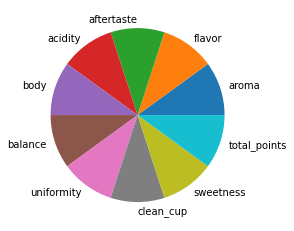

In [20]:
g = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
fig, ax = plt.subplots()
ax.pie(g, labels = aspects);

<p style="text-align: center; font-weight: bold; font-size:x-large; color:green; background-color:#D3EAB9;">Here are the countries represented in the database.</p>

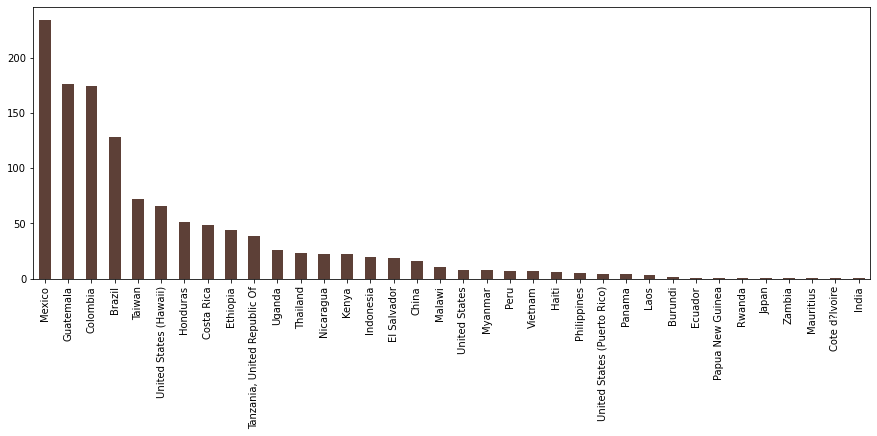

In [64]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
df.Country_of_Origin.value_counts().plot(kind="bar", color = '#5D4037');

<p style="text-align: center; font-weight: bold; font-size:x-large; color:green; background-color:#D3EAB9;">Here are the top 40 regions represented in the database.</p>

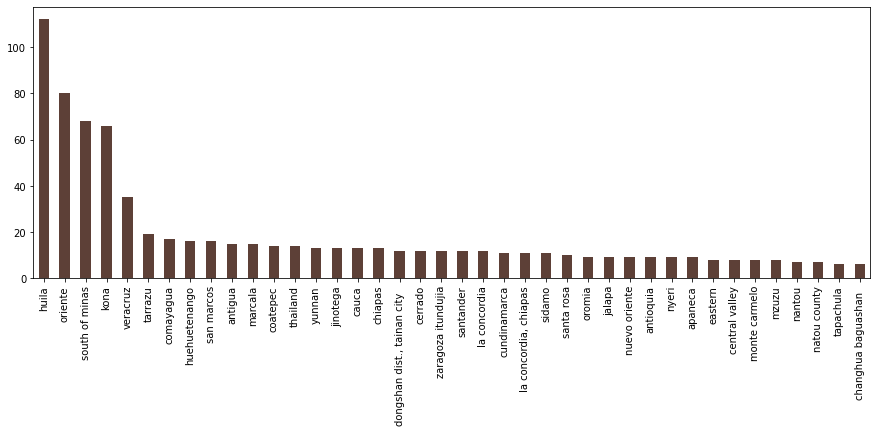

In [65]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
df.Region.value_counts().head(40).plot(kind="bar", color = '#5D4037');

<p style="text-align: center; font-weight: bold; font-size:x-large; color:green; background-color:#D3EAB9;">A coffee is considered "outstanding" if it scores a total of 85 or higher.</p>

In [72]:
df[df['Total_Cup_Points'] > 85]

,Country_of_Origin,Region,Total_Cup_Points
0,Ethiopia,guji-hambela,90.58
1,Ethiopia,guji-hambela,89.92
3,Ethiopia,oromia,89.00
4,Ethiopia,guji-hambela,88.83
7,Ethiopia,oromia,88.67
...,...,...,...
91,United States (Hawaii),kona,85.08
92,Colombia,cundinamarca,85.08
93,United States (Hawaii),kona,85.08
94,Ethiopia,sidamo,85.08
